In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
steam = pd.read_csv("Steam_Reviews.csv")
steam

Game                                             Review  \
0      Company of Heroes 3  I still believe CoH2 is the superior choice cu...   
1      Company of Heroes 3  I Pre-ordered the premium edition version of t...   
2      Company of Heroes 3  An underwhelming, expensive cash grab. Very lo...   
3      Company of Heroes 3  Here is my actual review. COH3 has the best Qo...   
4      Company of Heroes 3  They listed my GPU as supported and then quiet...   
...                    ...                                                ...   
40644      Baldur's Gate 3  It's not just a game! It's a whole story that ...   
40645      Baldur's Gate 3  It's the closest you're going to get to playin...   
40646      Baldur's Gate 3  verry gooood gammeeee. I slept on it for to lo...   
40647      Baldur's Gate 3  Funny wild magic sorceror Durge run made every...   
40648      Baldur's Gate 3  this game is amazing and a blast to play. ever...   

       Recommended                     Genre  
0            False          Action, Strategy  
1            False          Action, Strategy  
2            False          Action, Strategy  
3             True          Action, Strategy  
4            False          Action, Strategy  
...            ...                       ...  
40644         True  Adventure, RPG, Strategy  
40645         True  Adventure, RPG, Strategy  
40646         True  Adventure, RPG, Strategy  
40647         True  Adventure, RPG, Strategy  
40648         True  Adventure, RPG, Strategy  

[40649 rows x 4 columns]

add column boolean values

In [ ]:
max_commas = steam['Genre'].str.count(',').max()
print("Maximum number of commas in Genre column:", max_commas)

# Split the 'Genre' column by commas and stack the resulting lists into a single series
unique_genres = steam['Genre'].str.split(',').explode().str.strip().unique()

# Print the unique values
print("Unique Genres:", unique_genres)

# Print the number of unique values
print("Number of Unique Genres:", len(unique_genres))

for genre in unique_genres:
    steam[genre] = steam['Genre'].str.contains(genre).astype(bool)
    

steam.columns = [col.replace(' ', '_') for col in steam.columns]

# Display the first few rows to verify the new column names
steam.head()

In [4]:
print("There are", steam["Game"].nunique(), "games and a total of", steam.__len__(),"reviews")

There are 97 games and a total of 40649 reviews


In [5]:
for game, count in steam["Game"].value_counts().items():
    print(f"There are {count} reviews in the game {game}")

There are 1200 reviews in the game PUBG: BATTLEGROUNDS
There are 1200 reviews in the game Phasmophobia
There are 800 reviews in the game The Witcher 3: Wild Hunt
There are 800 reviews in the game Dying Light
There are 800 reviews in the game Valheim
There are 800 reviews in the game Dead by Daylight
There are 800 reviews in the game Euro Truck Simulator 2
There are 796 reviews in the game Battlefield 4‚Ñ¢
There are 796 reviews in the game Grand Theft Auto V Legacy
There are 792 reviews in the game Cookie Clicker
There are 762 reviews in the game Age of Empires II: Definitive Edition
There are 738 reviews in the game Europa Universalis IV
There are 584 reviews in the game 100% Orange Juice
There are 400 reviews in the game Titanfall¬Æ 2
There are 400 reviews in the game Keep Driving
There are 400 reviews in the game Resident Evil 4
There are 400 reviews in the game Warhammer 40,000: Space Marine 2
There are 400 reviews in the game Elite Dangerous
There are 400 reviews in the game Dead C

# Statistics of our Data Set:

/var/folders/qq/ny6dn2_d5wl2yjtn17gtz13r0000gn/T/ipykernel_90484/118637846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_games.values, y=top_games.index, palette="viridis")


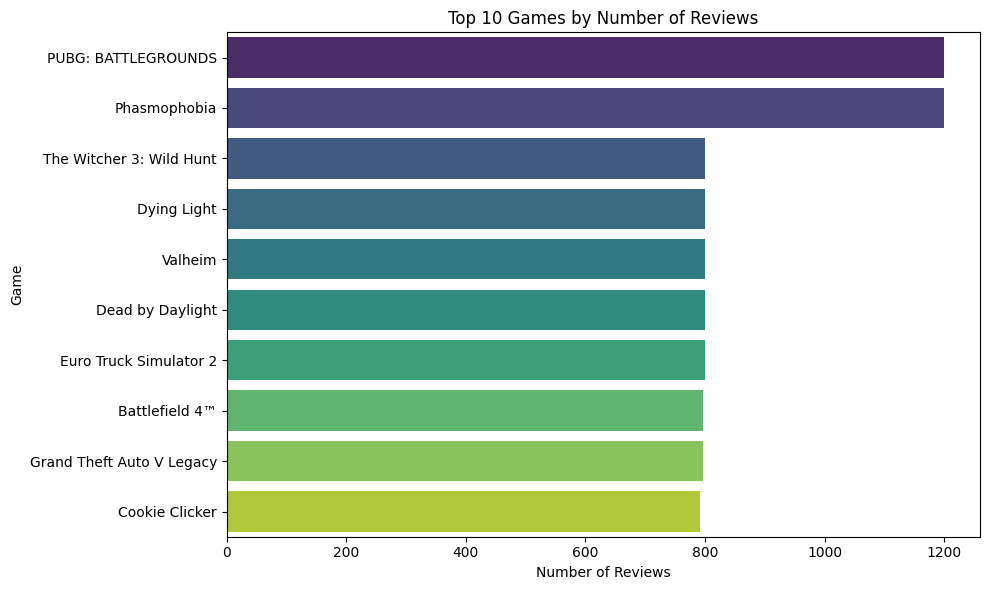

In [74]:
# -------------------------------
# Figure 1: Top 10 Games by Number of Reviews
# -------------------------------
top_games = steam['Game'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_games.values, y=top_games.index, palette="viridis")
plt.title("Top 10 Games by Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Game")
plt.tight_layout()
plt.show()



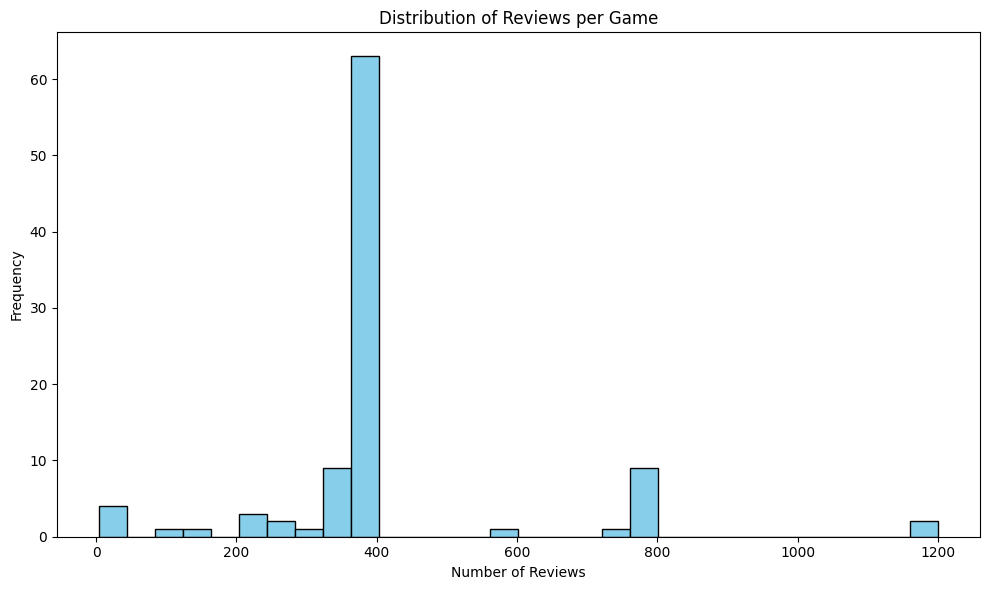

In [76]:
# -------------------------------
# Figure 2: Distribution of Reviews per Game
# -------------------------------
review_counts = steam['Game'].value_counts()
plt.figure(figsize=(10,6))
plt.hist(review_counts, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Reviews per Game")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



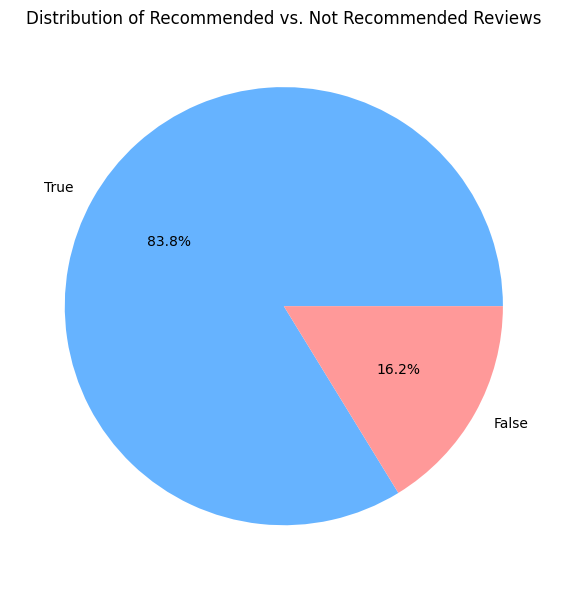

In [70]:
# -------------------------------
# Figure 3: Recommended vs. Not Recommended Reviews
# -------------------------------
if 'Recommended' in steam.columns:
    rec_counts = steam['Recommended'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(rec_counts, labels=rec_counts.index, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
    plt.title("Distribution of Recommended vs. Not Recommended Reviews")
    plt.tight_layout()
    plt.show()

# Text Pre Processing

In [6]:
import os
import re
import csv
import sys
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer, PorterStemmer
from nltk.corpus import stopwords
import spacy
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from tqdm import tqdm

from scipy.stats import pearsonr

# Function to download NLTK resources
def download_nltk_resources():
    required_resources = ['wordnet', 'stopwords', 'punkt']
    for resource in required_resources:
        try:
            nltk.data.find(f'tokenizers/{resource}' if resource == 'punkt' else f'corpora/{resource}')
        except LookupError:
            nltk.download(resource)

download_nltk_resources()

# Function to install and load spaCy model
def install_spacy_model(model_name):
    try:
        return spacy.load(model_name)
    except OSError:
        print(f"Downloading spaCy model: {model_name}")
        subprocess.check_call([sys.executable, "-m", "spacy", "download", model_name])
        return spacy.load(model_name)

sp = install_spacy_model('en_core_web_sm')

# Enable tqdm for pandas
tqdm.pandas()

# Initialize stemmers and lemmatizer
porter = SnowballStemmer("english")
lmtzr = WordNetLemmatizer()
STOP_WORDS = set(stopwords.words('english'))


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tirdodbehbehani/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
"""
This module provides helper functions for text preprocessing. 
Each function applies punctuation removal and stopword removal, and then one of three options:
    0: Lowercasing only.
    1: Lowercasing plus stemming.
    2: Lemmatizing (using spaCy; original casing is preserved).

The functions return a string of tokens separated by spaces.
"""


def preprocess_lower(text):
    """
    Preprocess text by:
       - Converting to lowercase.
       - Removing punctuation.
       - Tokenizing.
       - Removing stopwords.
    
    Returns:
        str: A string of filtered tokens separated by spaces.
    """
    text_lower = text.lower()
    text_no_punct = re.sub(r'[^\w\s]', '', text_lower)
    tokens = word_tokenize(text_no_punct)
    filtered_tokens = [token for token in tokens if token not in STOP_WORDS]
    return " ".join(filtered_tokens)

def preprocess_stem(text):
    """
    Preprocess text by performing all steps in preprocess_lower() and then applying stemming.
    
    Returns:
        str: A string of stemmed tokens separated by spaces.
    """
    tokens = preprocess_lower(text).split()
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return " ".join(stemmed_tokens)


# Function to remove emojis and special characters
def clean_text(text):
    text = re.sub(r'\[.*?\]', '', text)  # Remove HTML-like tags [b], [i], etc.
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keeps letters, numbers, and spaces
    return text

# Updated preprocess_lemma function
def preprocess_lemma(text):
    """
    Preprocess text by:
       - Removing special characters, emojis, and HTML tags.
       - Lemmatizing the text using spaCy.
       - Keeping only alphabetic words (removes numbers & symbols).
    
    Returns:
        str: A string of lemmatized words separated by spaces.
    """
    # Load spaCy model
    nlp = spacy.load("en_core_web_sm")
    text = clean_text(text)  # Remove special characters
    text = preprocess_lower(text)  # Lowercase and remove stopwords
    doc = nlp(text)  # Process text with spaCy
    lemmatized_tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]  # Keep only words
    return " ".join(lemmatized_tokens)



def tokenize(text, mode=0):
    """
    General tokenize function. Always applies punctuation and stopword removal and then:
    
      mode = 0: Applies lowercasing.
      mode = 1: Applies lowercasing and stemming.
      mode = 2: Applies lemmatization (without lowercasing the original text).
    
    Args:
        text (str): The input text to be processed.
        mode (int): Processing mode (0 for lowercasing; 1 for stemming; 2 for lemmatizing).

    Returns:
        str: A string of processed tokens separated by spaces.

    Raises:
        ValueError: If an invalid mode is provided.
    """
    if mode == 0:
        return preprocess_lower(text)
    elif mode == 1:
        return preprocess_stem(text)
    elif mode == 2:
        return preprocess_lemma(text)
    else:
        raise ValueError("Invalid mode. Please use 0 for lowercasing, 1 for stemming, or 2 for lemmatizing.")

In [63]:
# Select a specific review that has special characters
test_review = steam.loc[3076, "Review"]  # Row index we want to test

print("Original Review:")
print(test_review)

# Apply the function to one review
processed_test_review = preprocess_lemma(test_review)

print("\nProcessed Review:")
print(processed_test_review)



Original Review:
üåÄ Portal 2 ‚Äì A Timeless Masterpiece of Puzzle and Wit üé≠
üîπ Developer: Valve
üîπ Genre: Puzzle-Platformer
üîπ Release Date: April 18, 2011
üîπ Platforms: PC, PS3, Xbox 360, macOS, Linux

‚ú® The Cake May Be a Lie, But the Brilliance is Real!
Portal 2 isn‚Äôt just a game‚Äîit‚Äôs an intellectual playground that challenges your mind, tickles your funny bone, and immerses you in a world where physics, storytelling, and humor collide in perfect harmony. Valve took the innovative mechanics of the original Portal and expanded them into a fully fleshed-out masterpiece that still stands as one of the greatest games ever made.

üß© Gameplay ‚Äì A Brain-Bending Work of Art
At its core, Portal 2 is a first-person puzzle-platformer where you use the iconic Portal Gun to place two linked portals on surfaces, allowing for mind-bending traversal and puzzle-solving. But Valve went beyond simple portals:

‚úÖ New Mechanics ‚Äì Exciting additions like Gels (speed, bounce, a

In [12]:
#Getting the clean text column
mod=2 #Lemmatizing

# Pre-process the text column with progress tracking
try:
    steam["cleaned_review"] = steam["Review"].progress_apply(lambda x: tokenize(str(x), mod))
    print("Done processing text.")
except Exception as e:
    print(f"Error processing text column: {e}")
    sys.exit(1)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40649/40649 [7:01:23<00:00,  1.61it/s]      

Done processing text.


In [23]:
steam.to_csv("all_Steam_Reviews_cleaned_1.csv", index=False)

In [64]:
steam_reviews= pd.read_csv("all_Steam_Reviews_cleaned_1.csv")
steam_reviews

game                                             review  \
0      Company of Heroes 3  I still believe CoH2 is the superior choice cu...   
1      Company of Heroes 3  I Pre-ordered the premium edition version of t...   
2      Company of Heroes 3  An underwhelming, expensive cash grab. Very lo...   
3      Company of Heroes 3  Here is my actual review. COH3 has the best Qo...   
4      Company of Heroes 3  They listed my GPU as supported and then quiet...   
...                    ...                                                ...   
40644      Baldur's Gate 3  It's not just a game! It's a whole story that ...   
40645      Baldur's Gate 3  It's the closest you're going to get to playin...   
40646      Baldur's Gate 3  verry gooood gammeeee. I slept on it for to lo...   
40647      Baldur's Gate 3  Funny wild magic sorceror Durge run made every...   
40648      Baldur's Gate 3  this game is amazing and a blast to play. ever...   

       recommended                     genre  action  strategy  free_to_play  \
0            False          Action, Strategy    True      True         False   
1            False          Action, Strategy    True      True         False   
2            False          Action, Strategy    True      True         False   
3             True          Action, Strategy    True      True         False   
4            False          Action, Strategy    True      True         False   
...            ...                       ...     ...       ...           ...   
40644         True  Adventure, RPG, Strategy   False      True         False   
40645         True  Adventure, RPG, Strategy   False      True         False   
40646         True  Adventure, RPG, Strategy   False      True         False   
40647         True  Adventure, RPG, Strategy   False      True         False   
40648         True  Adventure, RPG, Strategy   False      True         False   

       adventure  massively_multiplayer  indie  ...  casual  racing  \
0          False                  False  False  ...   False   False   
1          False                  False  False  ...   False   False   
2          False                  False  False  ...   False   False   
3          False                  False  False  ...   False   False   
4          False                  False  False  ...   False   False   
...          ...                    ...    ...  ...     ...     ...   
40644       True                  False  False  ...   False   False   
40645       True                  False  False  ...   False   False   
40646       True                  False  False  ...   False   False   
40647       True                  False  False  ...   False   False   
40648       True                  False  False  ...   False   False   

       early_access  simulation  unknown_genre  sports  violent  education  \
0             False       False          False   False    False      False   
1             False       False          False   False    False      False   
2             False       False          False   False    False      False   
3             False       False          False   False    False      False   
4             False       False          False   False    False      False   
...             ...         ...            ...     ...      ...        ...   
40644         False       False          False   False    False      False   
40645         False       False          False   False    False      False   
40646         False       False          False   False    False      False   
40647         False       False          False   False    False      False   
40648         False       False          False   False    False      False   

       utilities                                     cleaned_review  
0          False  believe superior choice currently not triedgot...  
1          False  preordere premium edition version game put hun...  
2          False  underwhelme expensive cash grab low content su...  
3          False  

In [79]:
steam_reviews

game                                             review  \
0      Company of Heroes 3  I still believe CoH2 is the superior choice cu...   
1      Company of Heroes 3  I Pre-ordered the premium edition version of t...   
2      Company of Heroes 3  An underwhelming, expensive cash grab. Very lo...   
3      Company of Heroes 3  Here is my actual review. COH3 has the best Qo...   
4      Company of Heroes 3  They listed my GPU as supported and then quiet...   
...                    ...                                                ...   
40644      Baldur's Gate 3  It's not just a game! It's a whole story that ...   
40645      Baldur's Gate 3  It's the closest you're going to get to playin...   
40646      Baldur's Gate 3  verry gooood gammeeee. I slept on it for to lo...   
40647      Baldur's Gate 3  Funny wild magic sorceror Durge run made every...   
40648      Baldur's Gate 3  this game is amazing and a blast to play. ever...   

       recommended                     genre  action  strategy  free_to_play  \
0            False          Action, Strategy    True      True         False   
1            False          Action, Strategy    True      True         False   
2            False          Action, Strategy    True      True         False   
3             True          Action, Strategy    True      True         False   
4            False          Action, Strategy    True      True         False   
...            ...                       ...     ...       ...           ...   
40644         True  Adventure, RPG, Strategy   False      True         False   
40645         True  Adventure, RPG, Strategy   False      True         False   
40646         True  Adventure, RPG, Strategy   False      True         False   
40647         True  Adventure, RPG, Strategy   False      True         False   
40648         True  Adventure, RPG, Strategy   False      True         False   

       adventure  massively_multiplayer  indie  ...  casual  racing  \
0          False                  False  False  ...   False   False   
1          False                  False  False  ...   False   False   
2          False                  False  False  ...   False   False   
3          False                  False  False  ...   False   False   
4          False                  False  False  ...   False   False   
...          ...                    ...    ...  ...     ...     ...   
40644       True                  False  False  ...   False   False   
40645       True                  False  False  ...   False   False   
40646       True                  False  False  ...   False   False   
40647       True                  False  False  ...   False   False   
40648       True                  False  False  ...   False   False   

       early_access  simulation  unknown_genre  sports  violent  education  \
0             False       False          False   False    False      False   
1             False       False          False   False    False      False   
2             False       False          False   False    False      False   
3             False       False          False   False    False      False   
4             False       False          False   False    False      False   
...             ...         ...            ...     ...      ...        ...   
40644         False       False          False   False    False      False   
40645         False       False          False   False    False      False   
40646         False       False          False   False    False      False   
40647         False       False          False   False    False      False   
40648         False       False          False   False    False      False   

       utilities                                     cleaned_review  
0          False  believe superior choice currently not triedgot...  
1          False  preordere premium edition version game put hun...  
2          False  underwhelme expensive cash grab low content su...  
3          False  

In [ ]:
positive_reviews = steam_reviews[steam_reviews["Recommended"] == 1]
negative_reviews = steam_reviews[steam_reviews["Recommended"] == 0]

In [28]:
positive_reviews.to_csv("positive_steam_reviews_1.csv", index=False)
negative_reviews.to_csv("negative_steam_reviews_1.csv", index=False)

In [82]:
steam_reviews.columns


Index(['game', 'review', 'recommended', 'genre', 'action', 'strategy',
       'free_to_play', 'adventure', 'massively_multiplayer', 'indie', 'rpg',
       'casual', 'racing', 'early_access', 'simulation', 'unknown_genre',
       'sports', 'violent', 'education', 'utilities', 'cleaned_review'],
      dtype='object')

/var/folders/qq/ny6dn2_d5wl2yjtn17gtz13r0000gn/T/ipykernel_90484/2850296462.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="coolwarm")


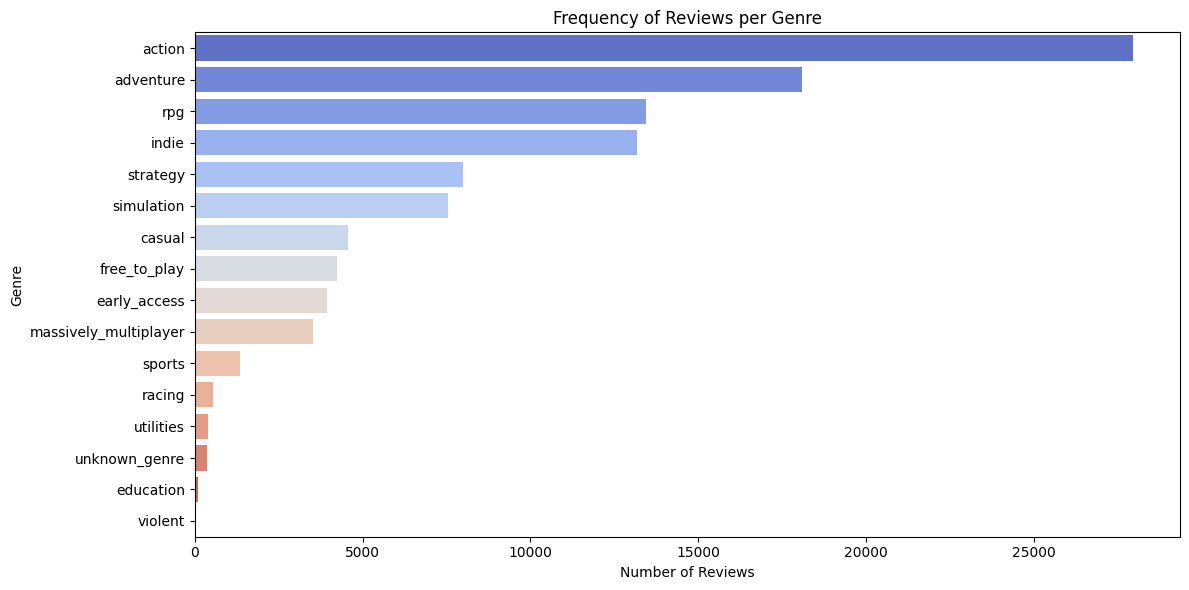

In [ ]:
# -------------------------------
# Figure 4: Genre Frequency in Reviews
# -------------------------------
# List of Unique Genres
unique_genres = ['action', 'strategy',
                'free_to_play', 'adventure', 'massively_multiplayer', 'indie', 'rpg',
                'casual', 'racing', 'early_access', 'simulation', 'unknown_genre',
                'sports', 'violent', 'education', 'utilities']


# Create a count for each genre by summing the boolean indicator columns
genre_counts = {}
for genre in unique_genres:
    genre_counts[genre] = steam_reviews[genre.lower()].sum() # Using columns for each genre 

genre_counts = pd.Series(genre_counts).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="coolwarm")
plt.title("Frequency of Reviews per Genre")
plt.xlabel("Number of Reviews")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
